In [6]:
from BODdata import BOD, BOD2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
x_bod = BOD[:, 0]
y_bod = BOD[:, 1]

x_bod2 = BOD2[:, 0]
y_bod2 = BOD2[:, 1]

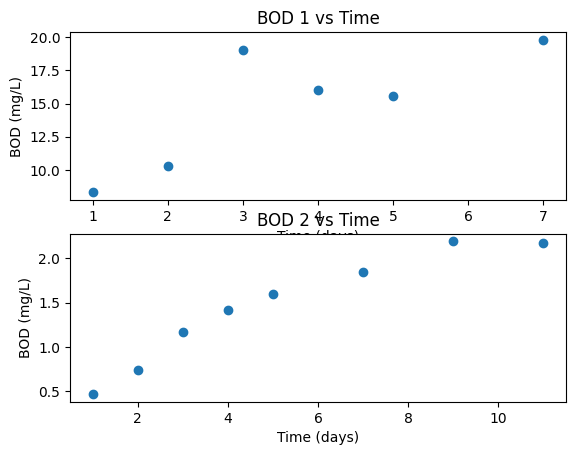

In [8]:
#Plot
fig, axs = plt.subplots(2, 1)

axs[0].plot(x_bod, y_bod, 'o')
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('BOD (mg/L)')
axs[0].set_title('BOD 1 vs Time')

axs[1].plot(x_bod2, y_bod2, 'o')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('BOD (mg/L)')
axs[1].set_title('BOD 2 vs Time')

plt.show()

[19.14257663  0.53109125]


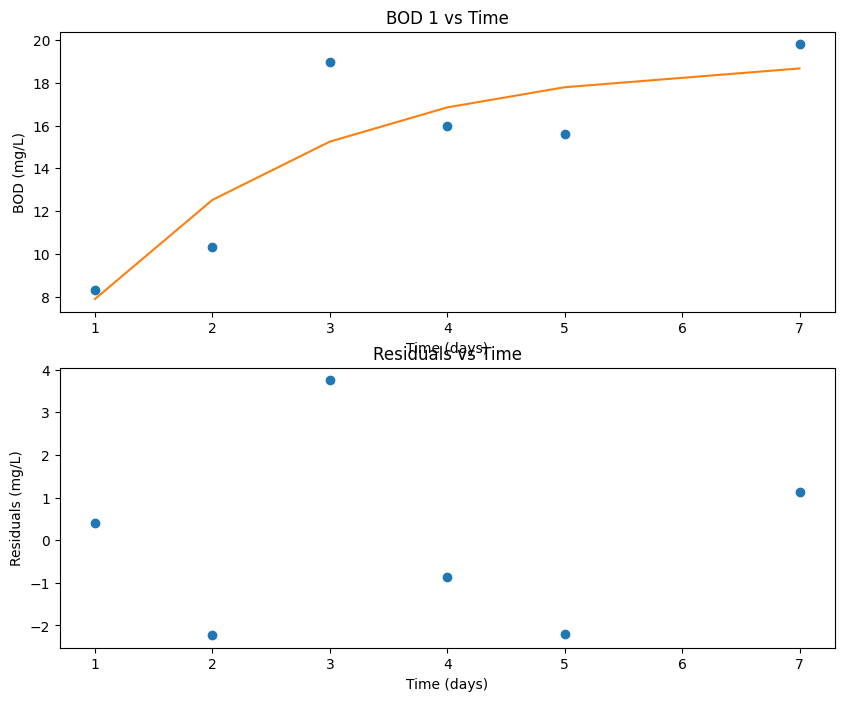

In [14]:
#Make a nonlinear regression and plot the residuals

def model(t, p1, p2):
    return p1 * (1 - np.exp(-p2 * t))

popt, pcov = curve_fit(model, x_bod, y_bod)

print(f"popt: {popt}")

residuals = y_bod - model(x_bod, *popt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(x_bod, y_bod, 'o')
axs[0].plot(x_bod, model(x_bod, *popt))
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('BOD (mg/L)')
axs[0].set_title('BOD 1 vs Time')

axs[1].plot(x_bod, residuals, 'o')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Residuals (mg/L)')
axs[1].set_title('Residuals vs Time')

plt.show()